# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [380]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [381]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

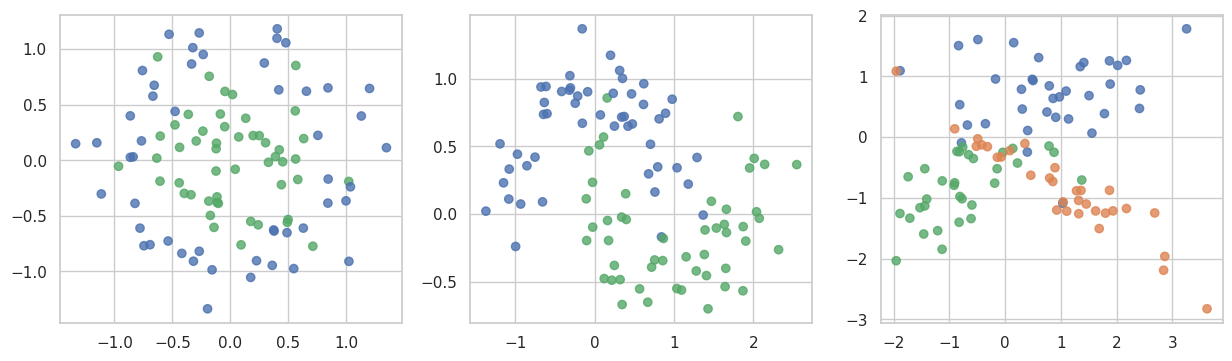

In [382]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [383]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [384]:
X, y = datasets[0]

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [386]:
from sklearn.tree import DecisionTreeRegressor

In [387]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

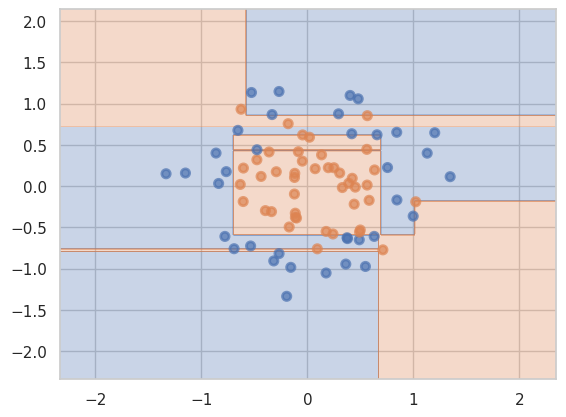

In [388]:
plot_surface(clf, X_train, y_train)

In [389]:
accuracy_score(y_train, clf.predict(X_train))

1.0

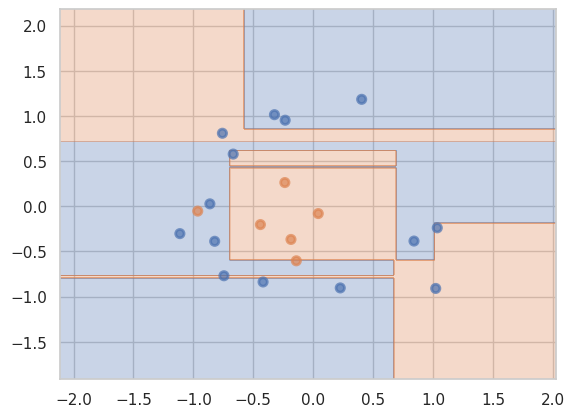

In [390]:
plot_surface(clf, X_test, y_test)

In [391]:
accuracy_score(y_test, clf.predict(X_test))

0.65

In [392]:
X, y = datasets[1]

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [394]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

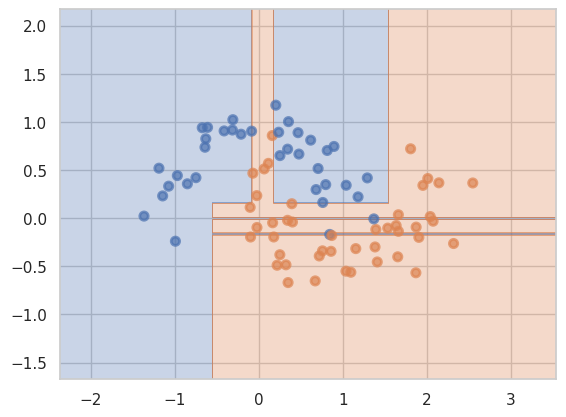

In [395]:
plot_surface(clf, X_train, y_train)

In [396]:
accuracy_score(y_train, clf.predict(X_train))

1.0

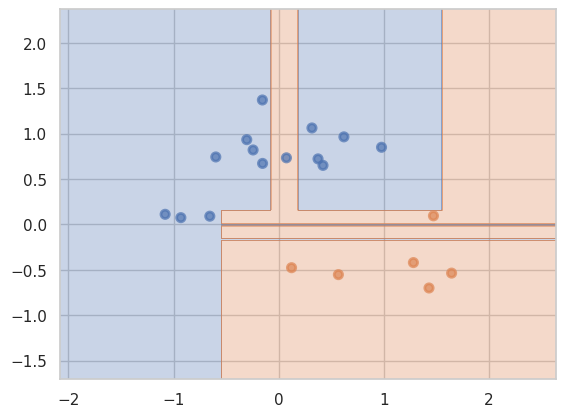

In [397]:
plot_surface(clf, X_test, y_test)

In [398]:
accuracy_score(y_test, clf.predict(X_test))

0.95

In [399]:
X, y = datasets[2]

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [401]:
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

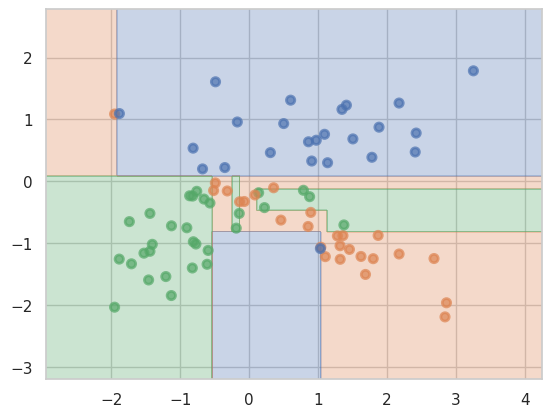

In [402]:
plot_surface(clf, X_train, y_train)

In [403]:
accuracy_score(y_train, clf.predict(X_train))

1.0

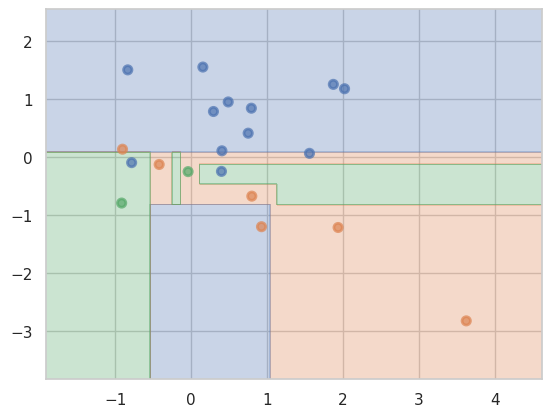

In [404]:
plot_surface(clf, X_test, y_test)

In [405]:
accuracy_score(y_test, clf.predict(X_test))

0.7

__Ответ:__ Первое дерево переобучилось сильно, качество на тесте упало значительно. Второе практически не переобучилось, качество осталось почти таким же. Третье тоже переобучилось сильно, но не так сильно, как первое.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Оба эти параметра нужны для того, чтобы дерево не переобучалось. Можно заметить, что если мы фиксируем, например, кол-во листьев и меняем максимальную глубину, то сначала точность будет расти, а потом падать, потому что мы начнем переобучаться, и выделять отдельную область под очень небольшие скопления объектов. Для очень сложных моделей, где и кол-во листьев и глубина заданы очень большими, даже ошибка на оубчающей выборе будет большой, потому что дерево уже будет пытаться не правильно подогнать пороги, а подстроиться под нужные нам ограничения. Конечно, лучший результат дают праивльно взвешенные комбинации - где деревья не слишкмо глубокие, чтобы переобучиться, но при этом не слишком простые, чтобы не смочь в силу ограничений найти закономерности, и при этом где минимальное количество листьев не очень большое, иначе и на трейне, и на тесте будут плохие показатели. Хотя, конечно, с листьями эта взаимосвязь прослеживается тяжелее. Чем более сложное расположение точек, тем глубже нужно дерево, но при этом при сложном расположении у нас могут начать выделяться точки по одной в отдельные куски, что будет являться признаком переобучения, так что лучше балансировать))

In [421]:
from sklearn.model_selection import ParameterGrid

In [422]:
param_grid = list(ParameterGrid({'max_depth': np.rint(np.logspace(1, 5, num=5, base=2)).astype(int),'min_samples_leaf': np.rint(np.logspace(1, 5, num=5, base=2)).astype(int)}))

For depth 2 and leaves 2 accuracy on train is equal to 0.8 and on test is equal to 0.65
For depth 2 and leaves 4 accuracy on train is equal to 0.8 and on test is equal to 0.65
For depth 2 and leaves 8 accuracy on train is equal to 0.8 and on test is equal to 0.65
For depth 2 and leaves 16 accuracy on train is equal to 0.775 and on test is equal to 0.7
For depth 2 and leaves 32 accuracy on train is equal to 0.5875 and on test is equal to 0.5
For depth 4 and leaves 2 accuracy on train is equal to 0.9375 and on test is equal to 0.8
For depth 4 and leaves 4 accuracy on train is equal to 0.925 and on test is equal to 0.75
For depth 4 and leaves 8 accuracy on train is equal to 0.85 and on test is equal to 0.9
For depth 4 and leaves 16 accuracy on train is equal to 0.775 and on test is equal to 0.7
For depth 4 and leaves 32 accuracy on train is equal to 0.5875 and on test is equal to 0.5
For depth 8 and leaves 2 accuracy on train is equal to 0.9375 and on test is equal to 0.8
For depth 8 and 

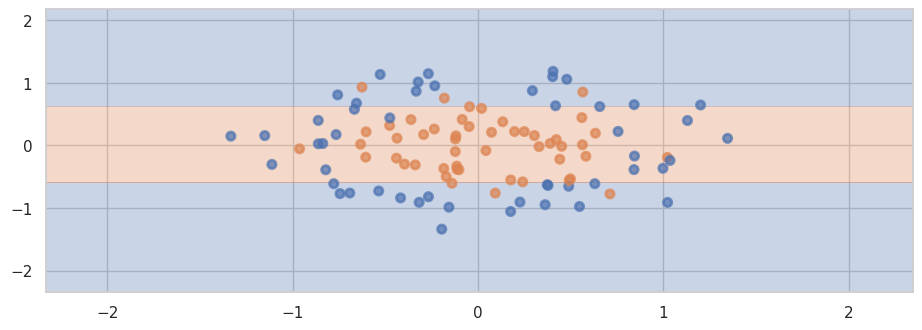

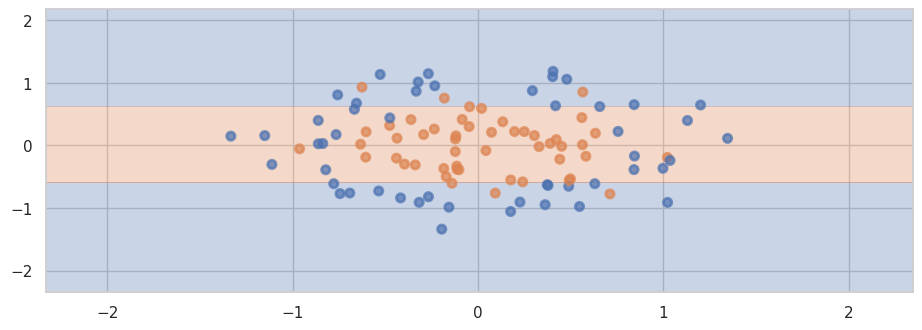

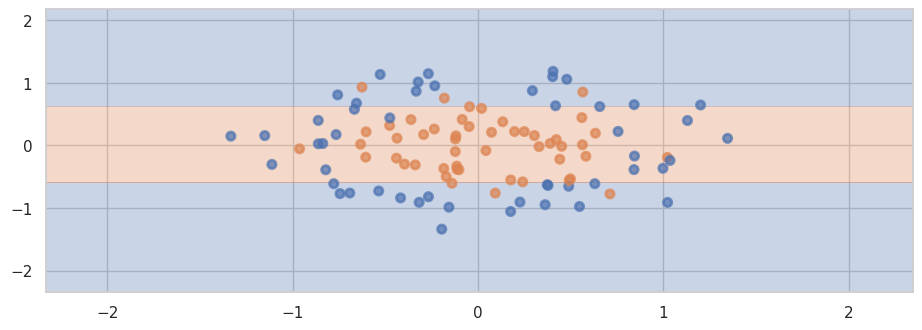

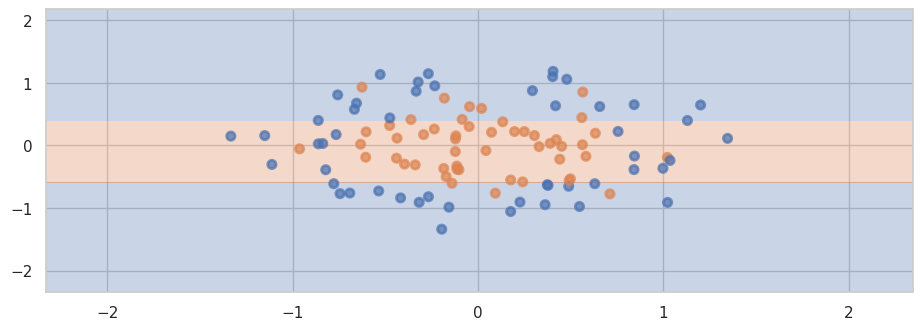

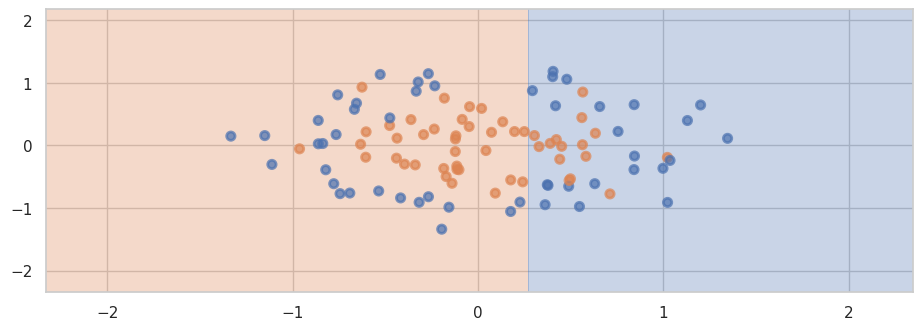

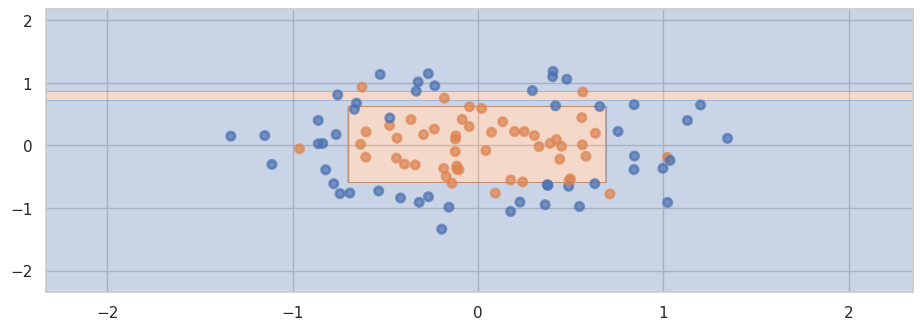

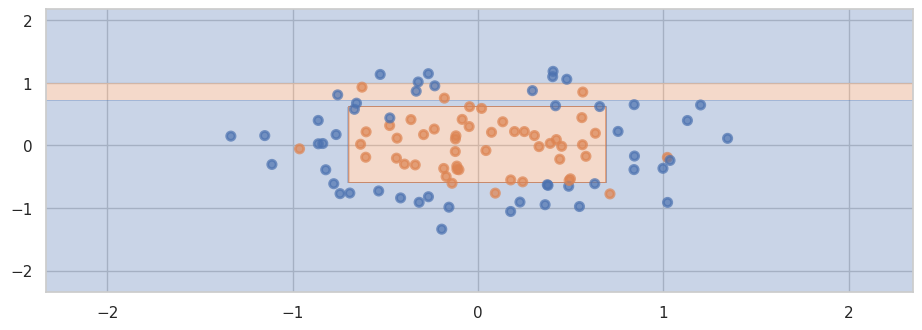

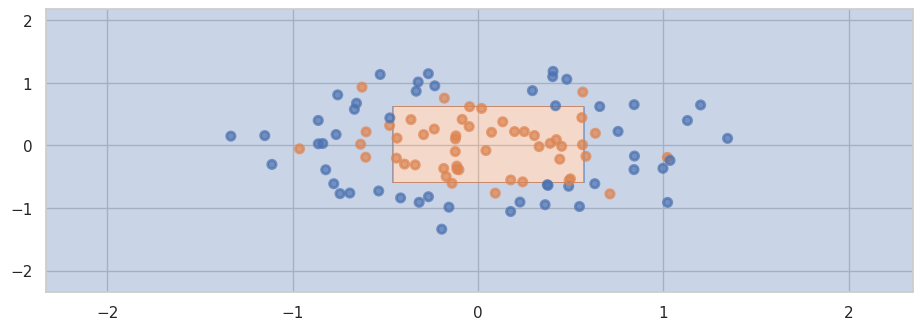

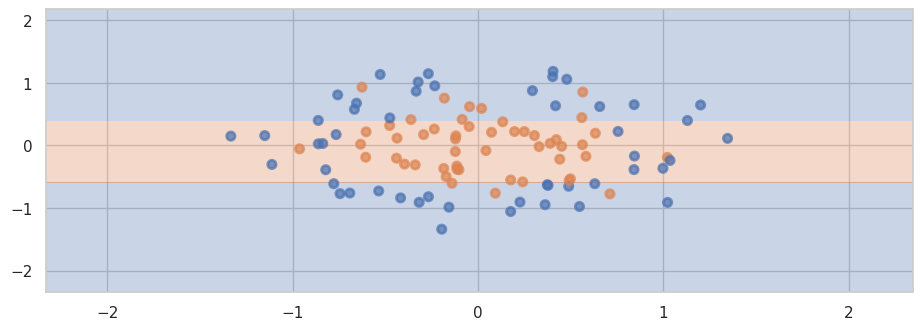

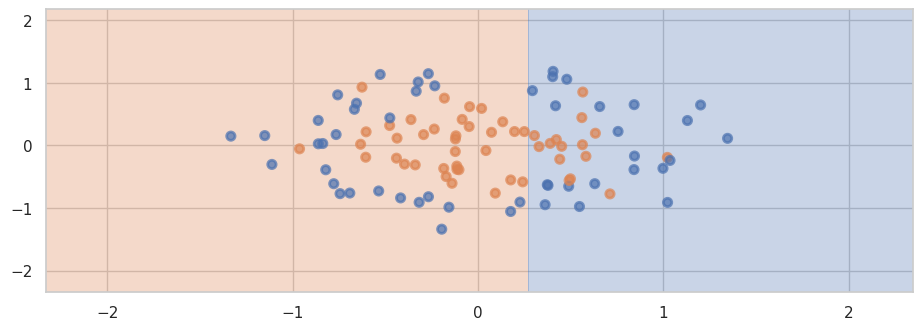

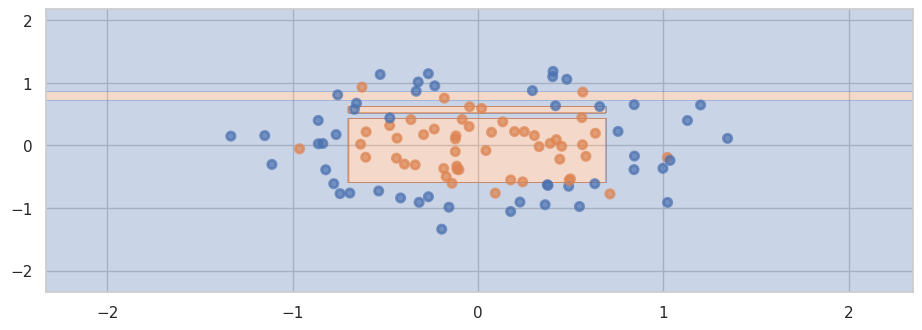

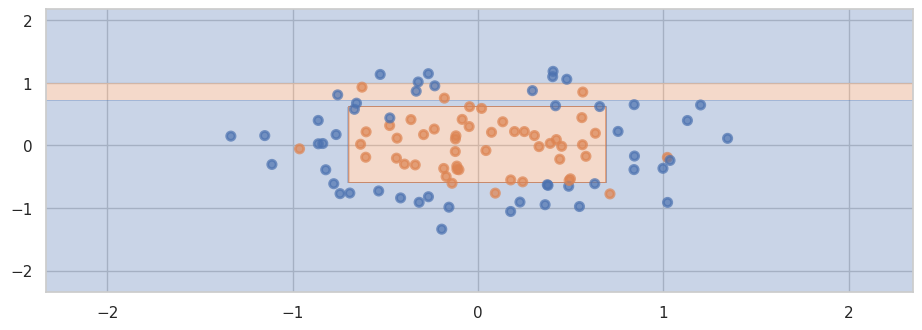

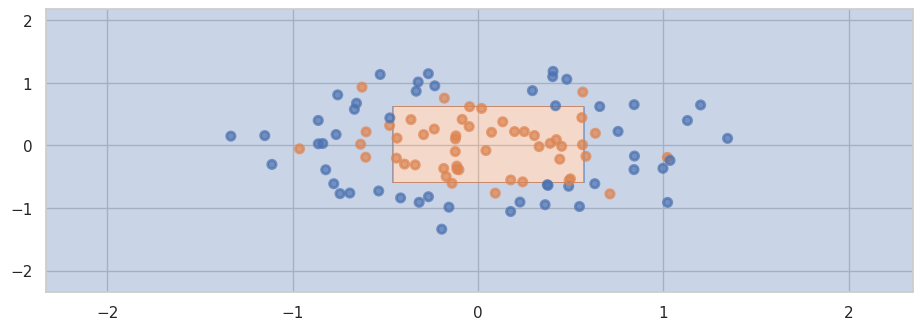

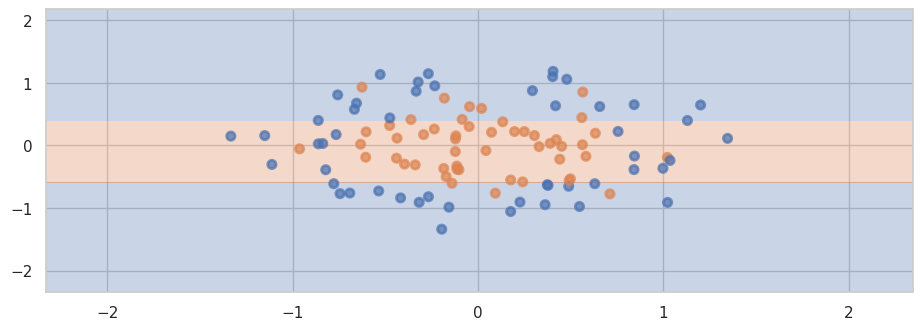

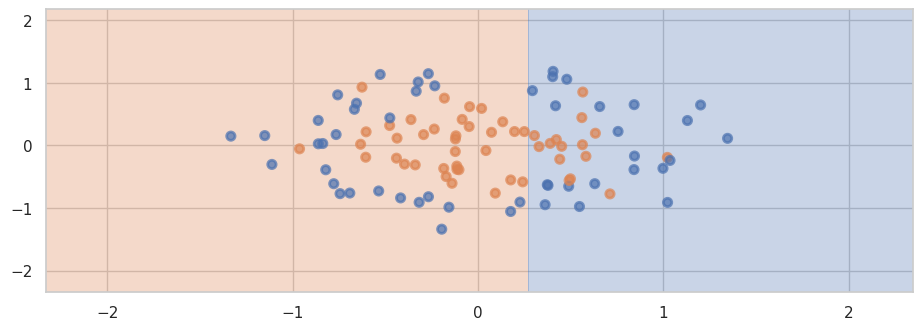

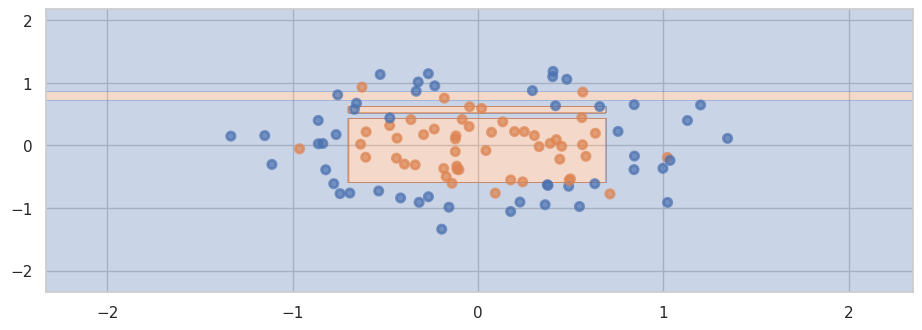

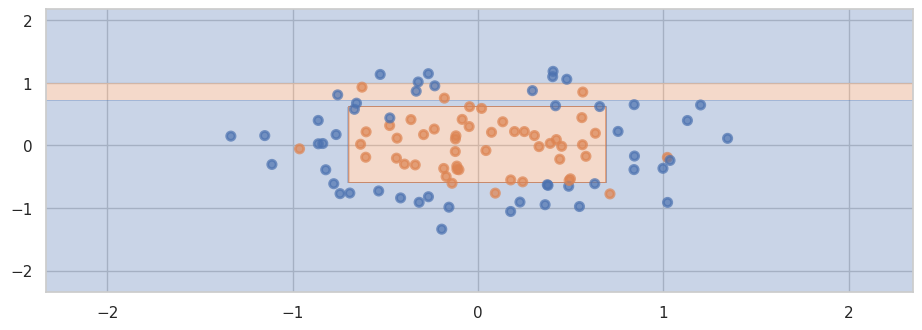

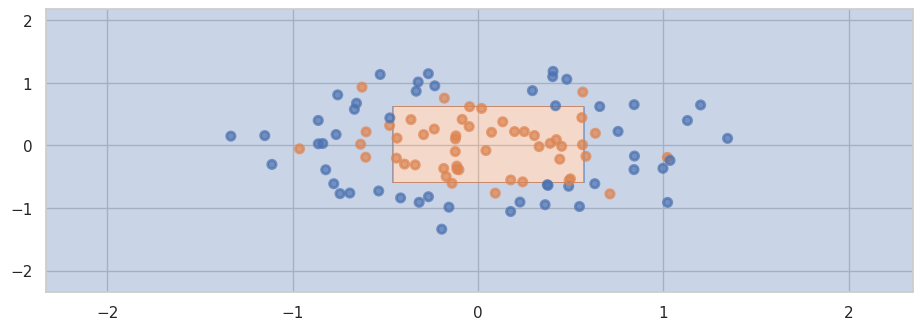

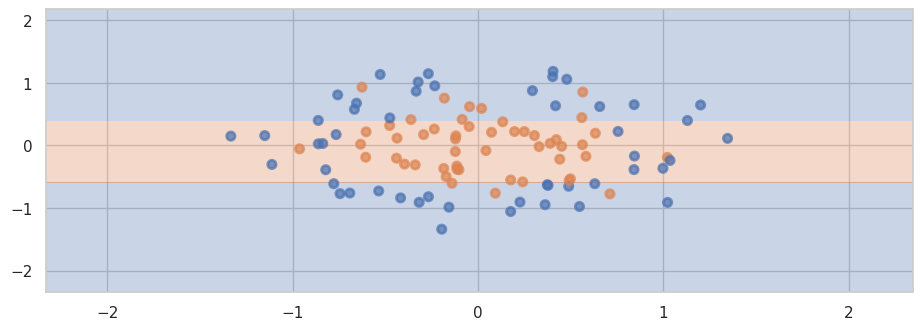

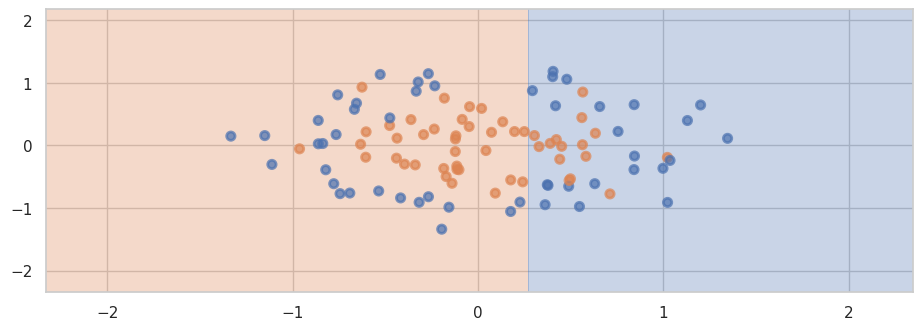

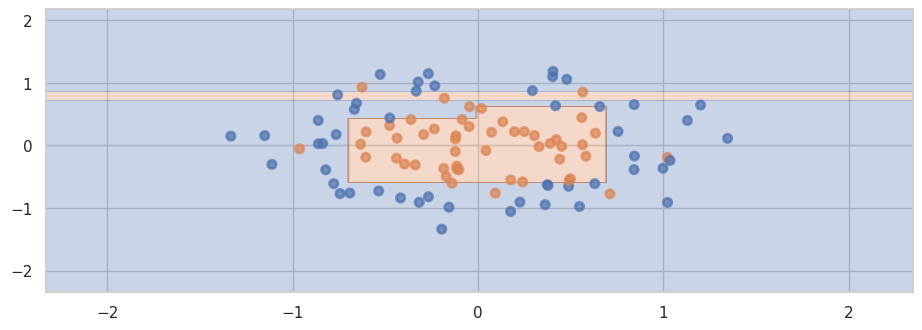

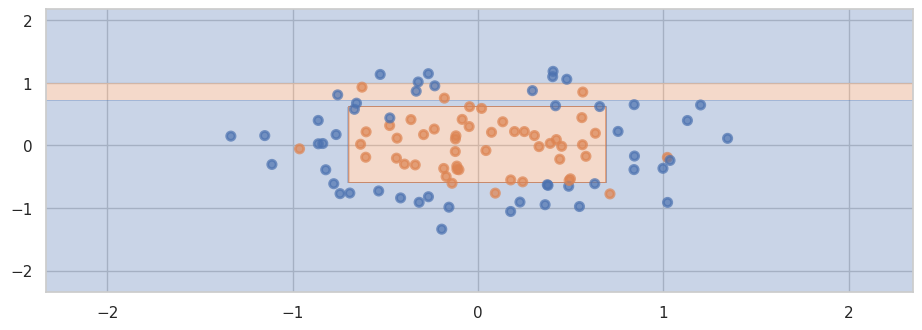

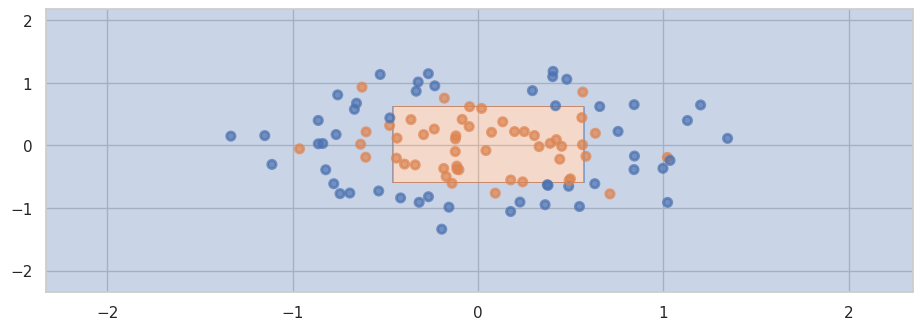

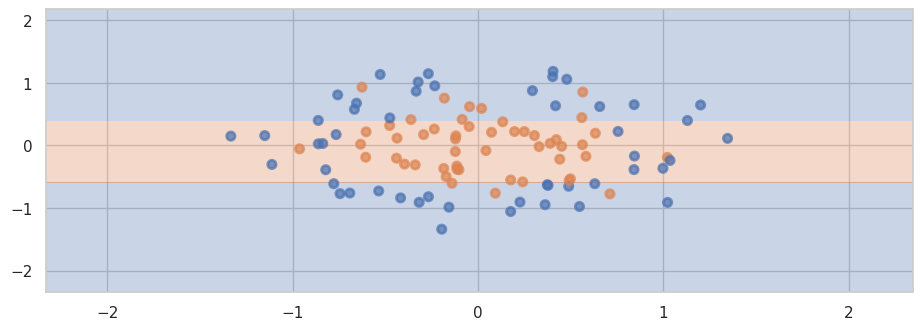

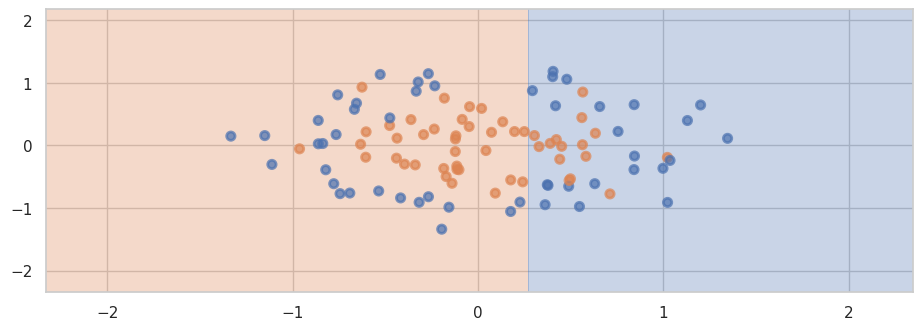

In [428]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

for param in param_grid:
    fig, ax = plt.subplots(figsize=(10, 4))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    lr  = DecisionTreeClassifier(max_depth = param['max_depth'], min_samples_leaf = param['min_samples_leaf']).fit(X_train, y_train)
    print(f"For depth {param['max_depth']} and leaves {param['min_samples_leaf']} accuracy on train is equal to {accuracy_score(y_train, lr.predict(X_train))} and on test is equal to {accuracy_score(y_test, lr.predict(X_test))}")
    plot_surface(lr, X, y)

For depth 2 and leaves 2 accuracy on train is equal to 0.9125 and on test is equal to 1.0
For depth 2 and leaves 4 accuracy on train is equal to 0.8875 and on test is equal to 1.0
For depth 2 and leaves 8 accuracy on train is equal to 0.85 and on test is equal to 0.8
For depth 2 and leaves 16 accuracy on train is equal to 0.825 and on test is equal to 0.85
For depth 2 and leaves 32 accuracy on train is equal to 0.825 and on test is equal to 0.85
For depth 4 and leaves 2 accuracy on train is equal to 0.975 and on test is equal to 0.95
For depth 4 and leaves 4 accuracy on train is equal to 0.95 and on test is equal to 0.95
For depth 4 and leaves 8 accuracy on train is equal to 0.875 and on test is equal to 0.75
For depth 4 and leaves 16 accuracy on train is equal to 0.825 and on test is equal to 0.85
For depth 4 and leaves 32 accuracy on train is equal to 0.825 and on test is equal to 0.85
For depth 8 and leaves 2 accuracy on train is equal to 0.975 and on test is equal to 0.95
For depth

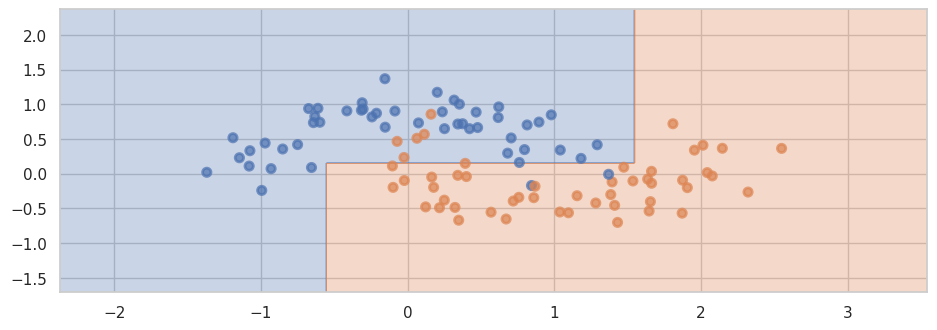

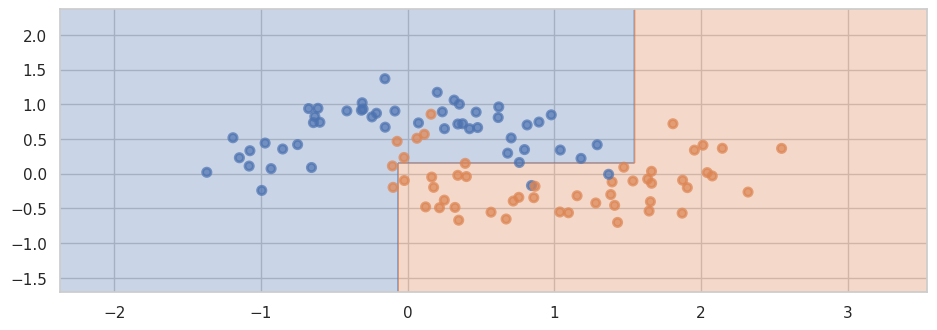

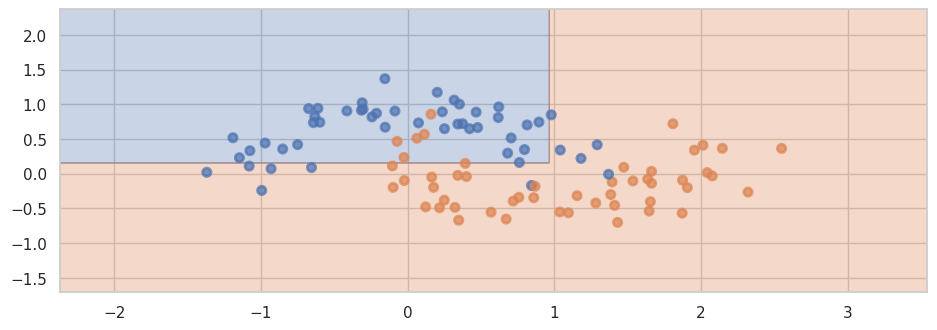

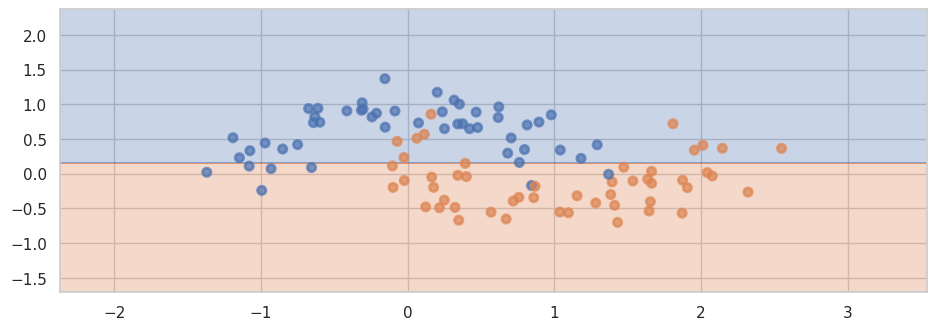

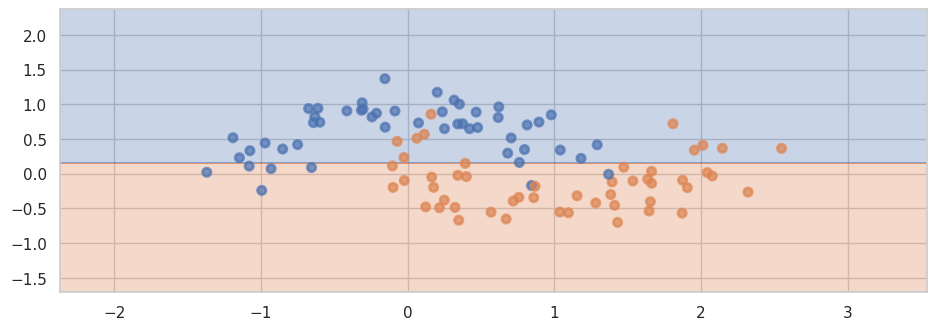

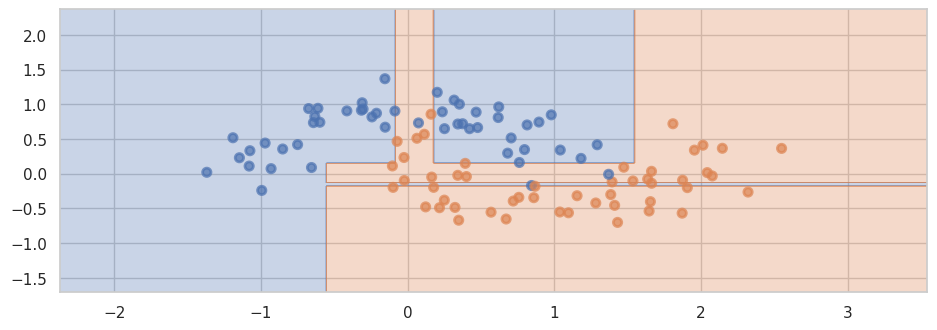

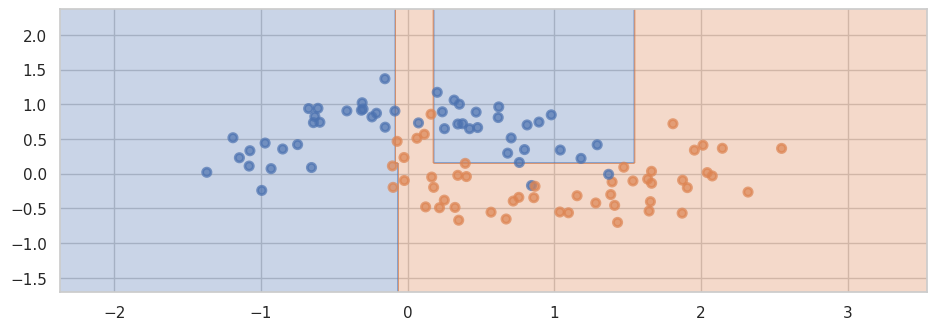

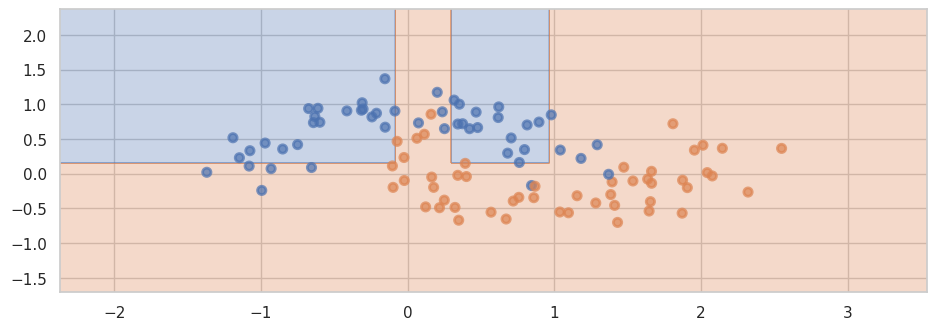

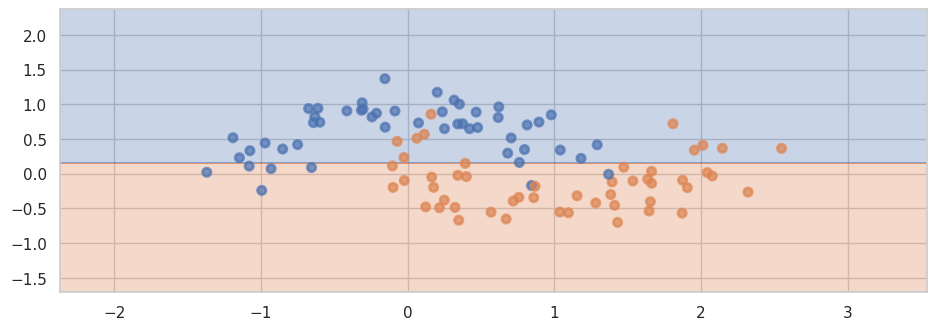

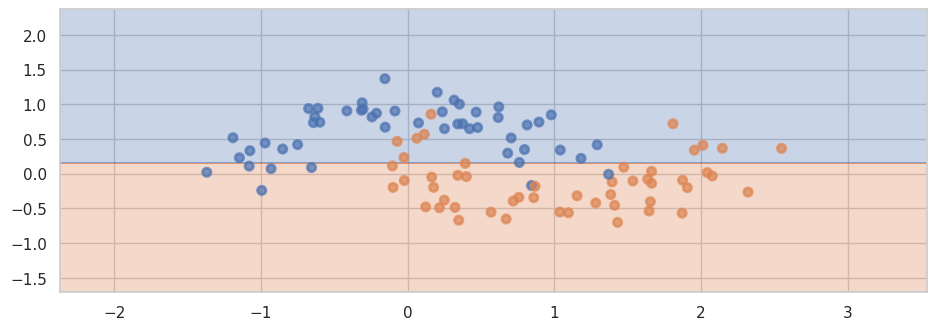

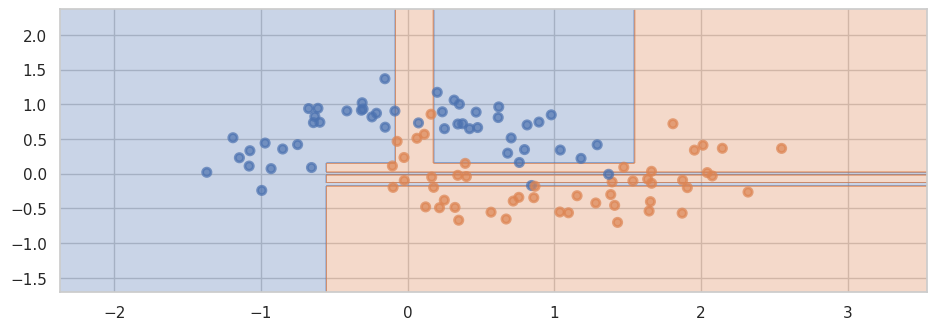

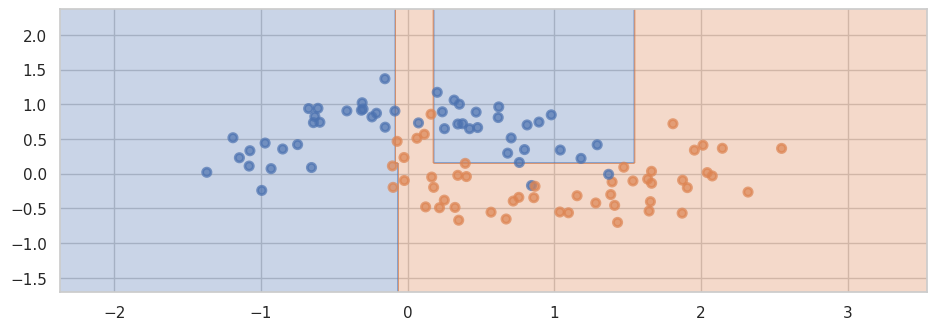

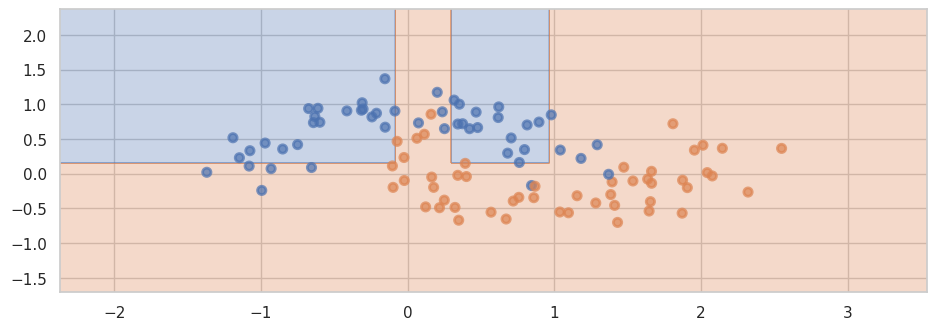

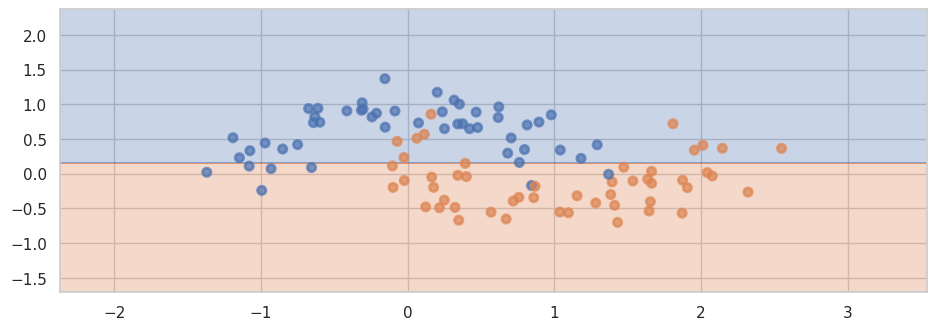

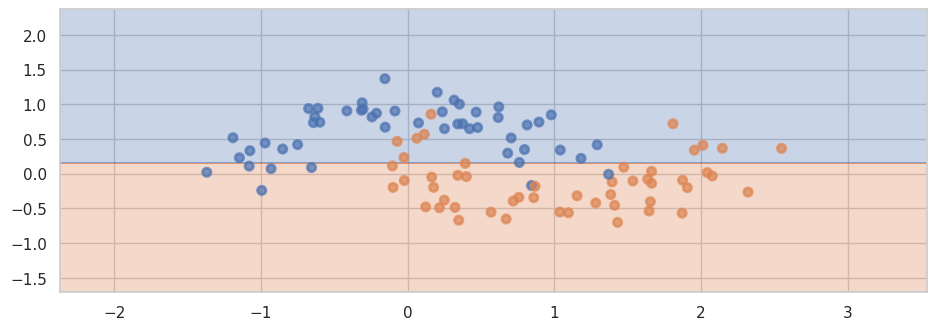

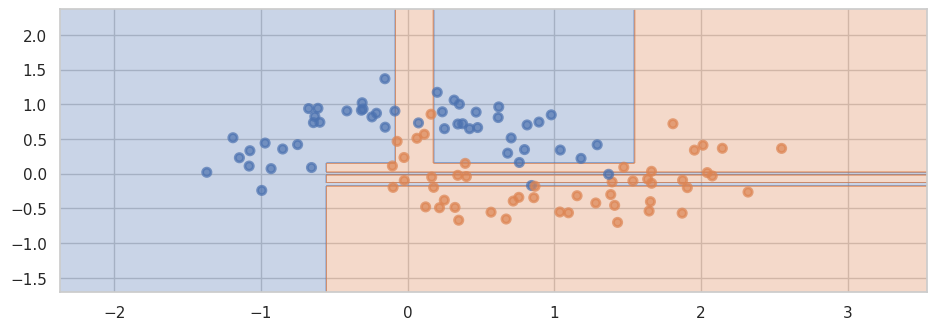

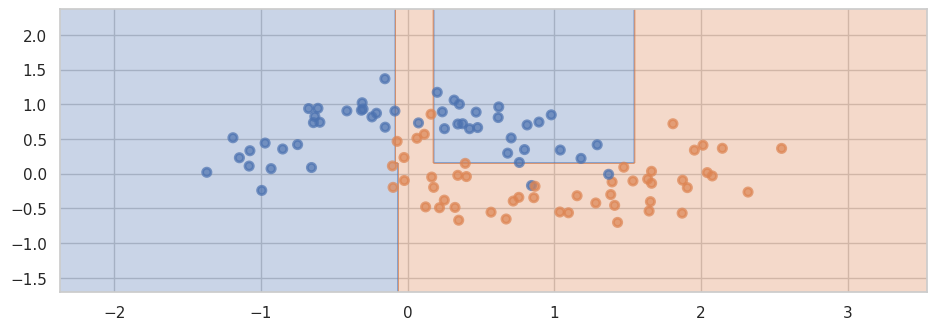

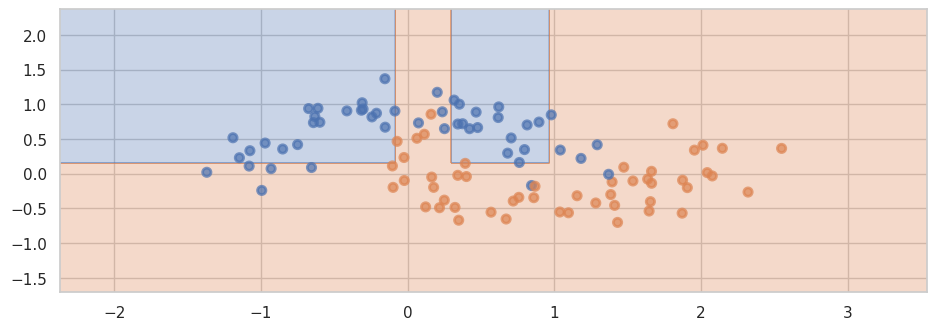

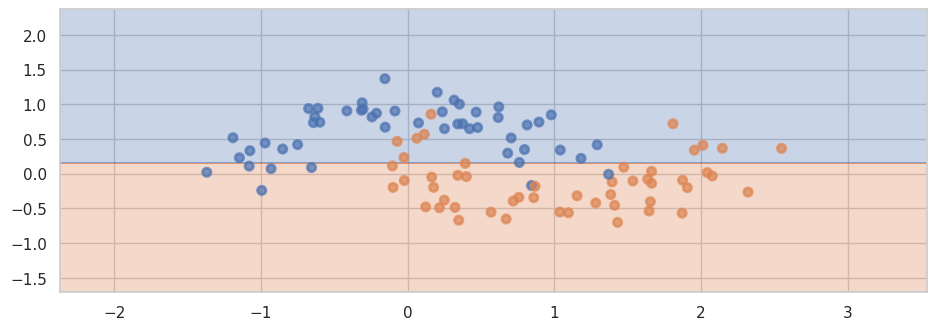

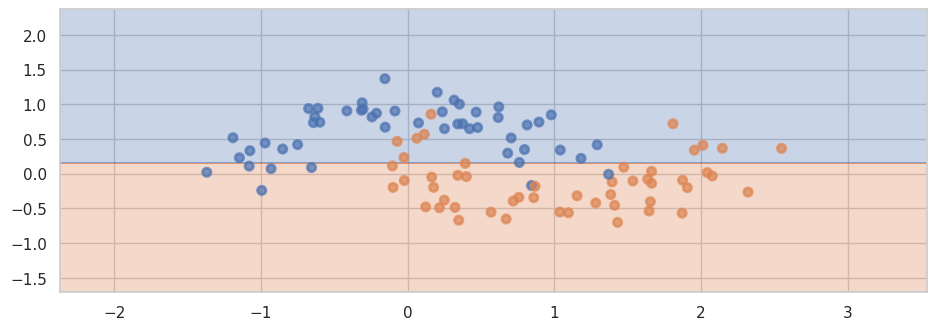

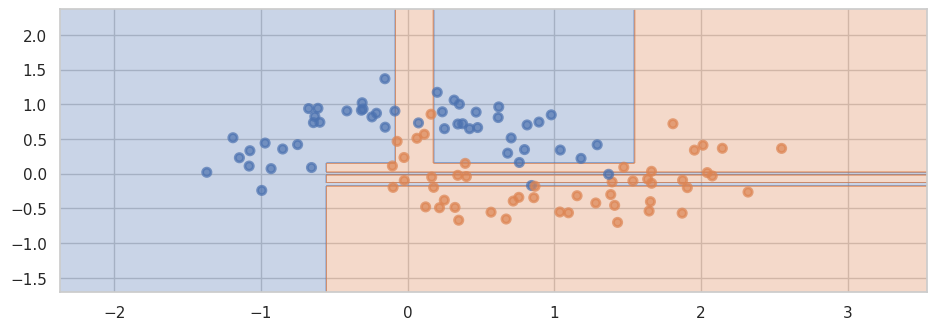

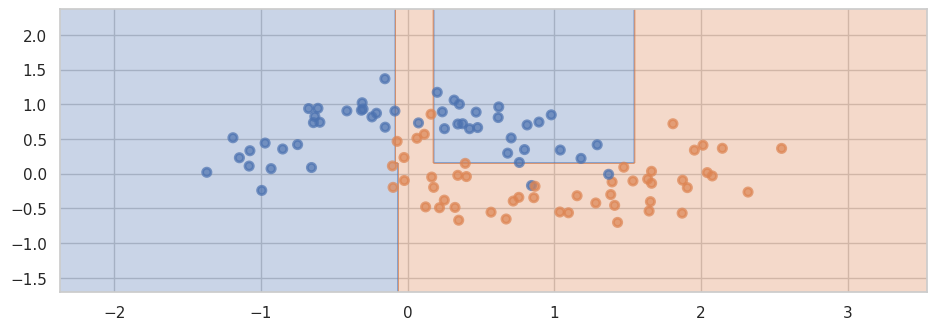

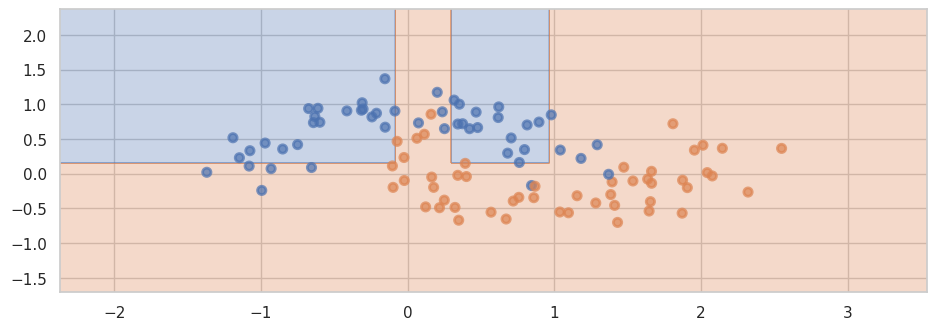

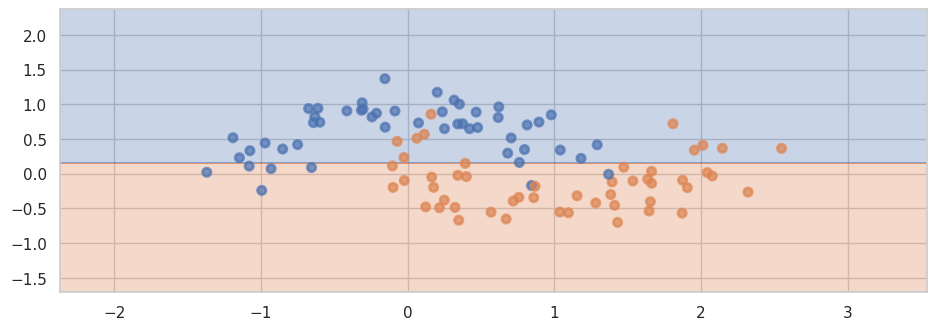

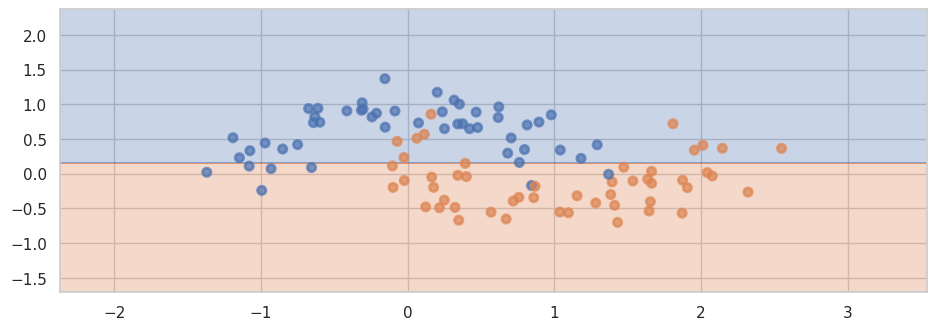

In [429]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

for param in param_grid:
    fig, ax = plt.subplots(figsize=(10, 4))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    lr  = DecisionTreeClassifier(max_depth = param['max_depth'], min_samples_leaf = param['min_samples_leaf']).fit(X_train, y_train)
    print(f"For depth {param['max_depth']} and leaves {param['min_samples_leaf']} accuracy on train is equal to {accuracy_score(y_train, lr.predict(X_train))} and on test is equal to {accuracy_score(y_test, lr.predict(X_test))}")
    plot_surface(lr, X, y)

For depth 2 and leaves 2 accuracy on train is equal to 0.8875 and on test is equal to 0.75
For depth 2 and leaves 4 accuracy on train is equal to 0.8875 and on test is equal to 0.75
For depth 2 and leaves 8 accuracy on train is equal to 0.8875 and on test is equal to 0.75
For depth 2 and leaves 16 accuracy on train is equal to 0.8875 and on test is equal to 0.75
For depth 2 and leaves 32 accuracy on train is equal to 0.625 and on test is equal to 0.65
For depth 4 and leaves 2 accuracy on train is equal to 0.8875 and on test is equal to 0.7
For depth 4 and leaves 4 accuracy on train is equal to 0.9 and on test is equal to 0.7
For depth 4 and leaves 8 accuracy on train is equal to 0.9 and on test is equal to 0.7
For depth 4 and leaves 16 accuracy on train is equal to 0.8875 and on test is equal to 0.75
For depth 4 and leaves 32 accuracy on train is equal to 0.625 and on test is equal to 0.65
For depth 8 and leaves 2 accuracy on train is equal to 0.95 and on test is equal to 0.7
For depth

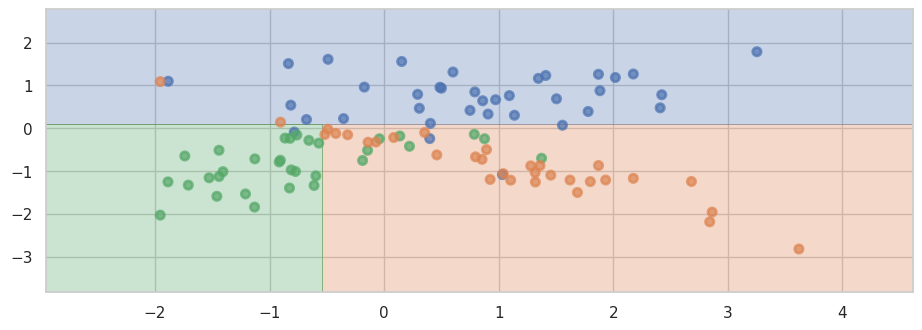

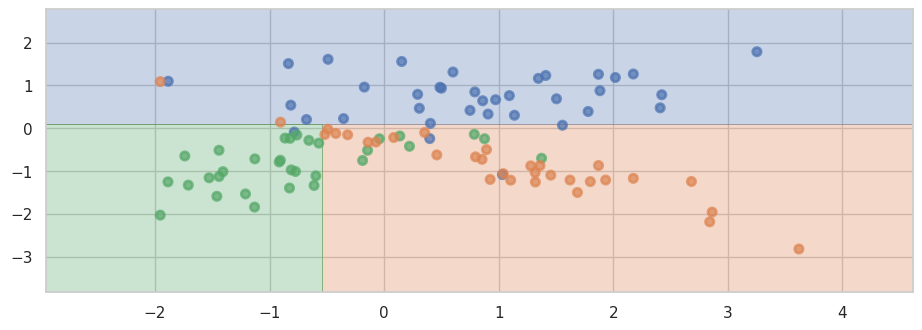

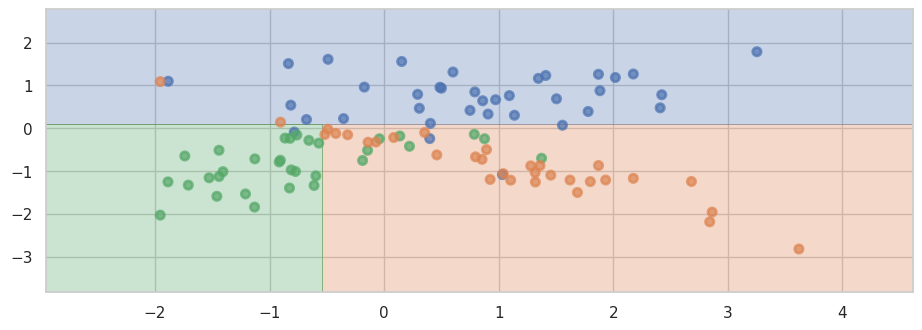

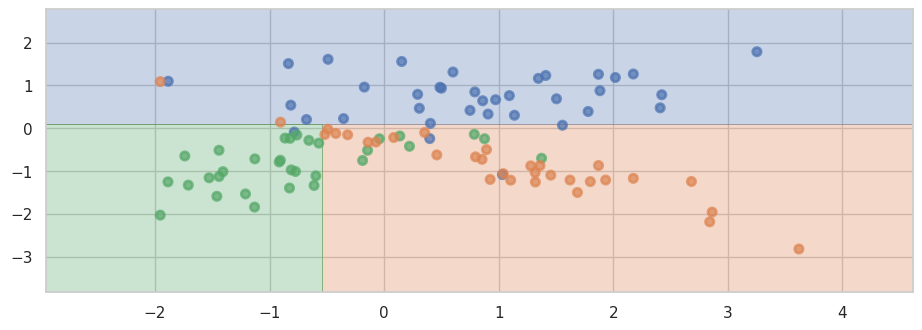

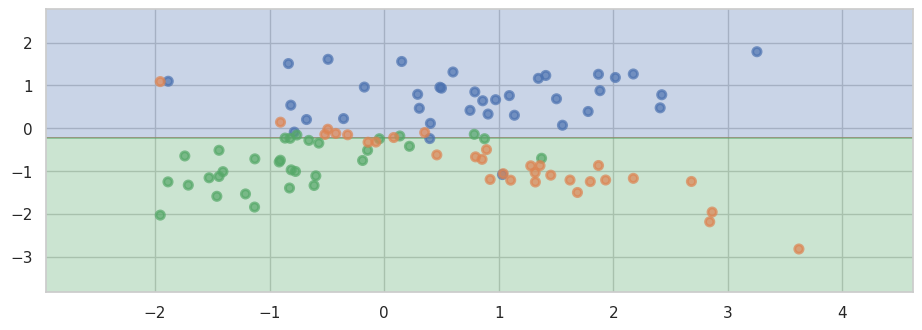

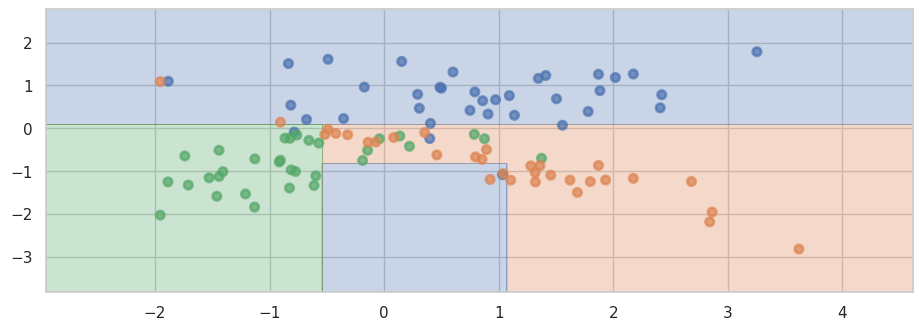

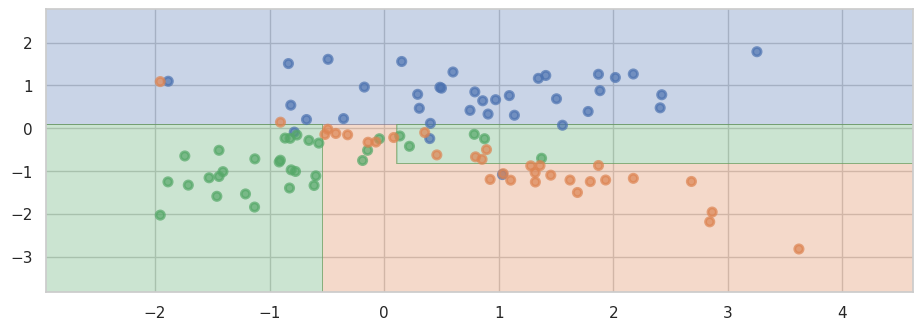

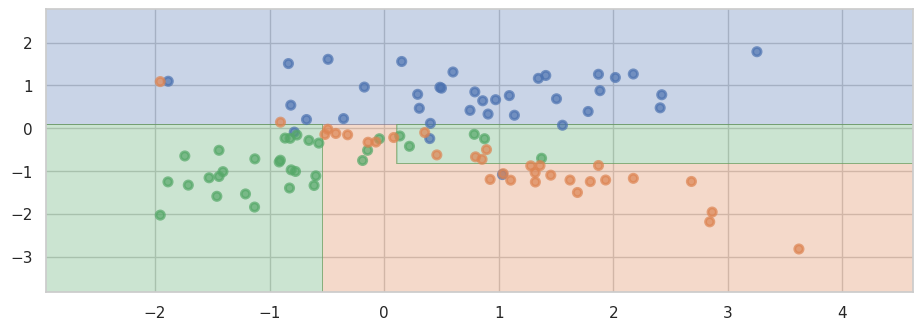

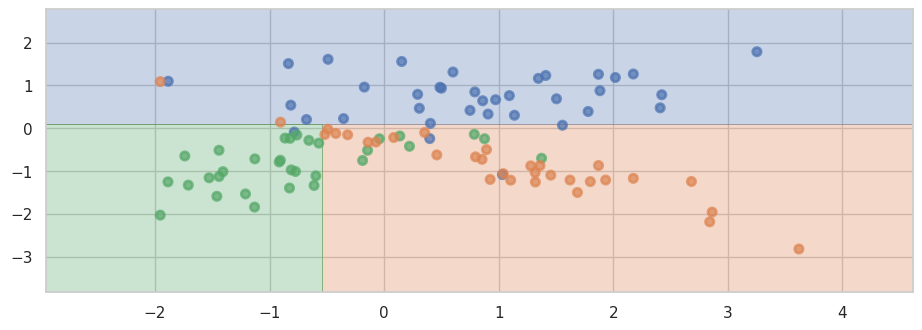

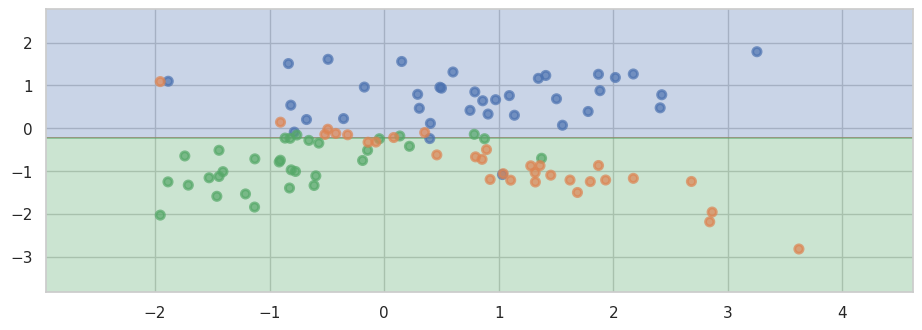

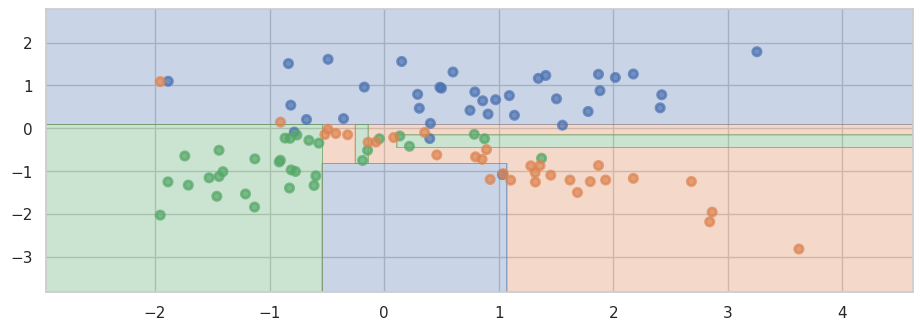

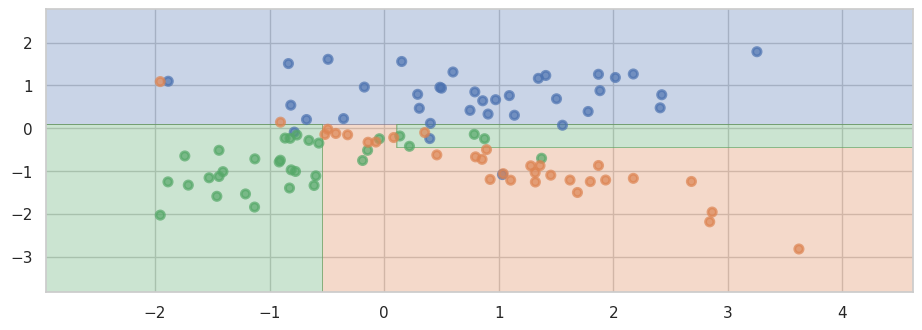

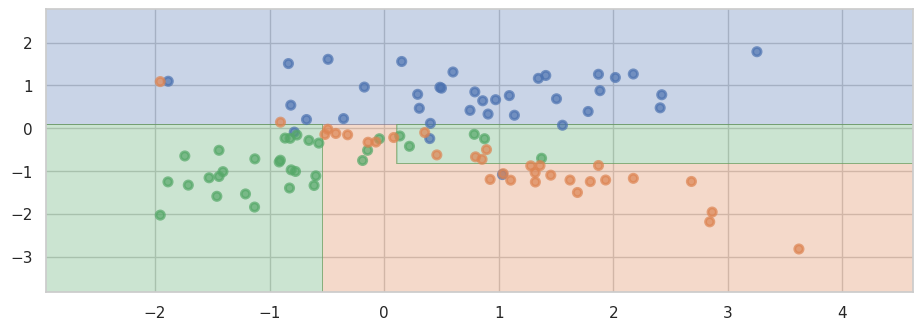

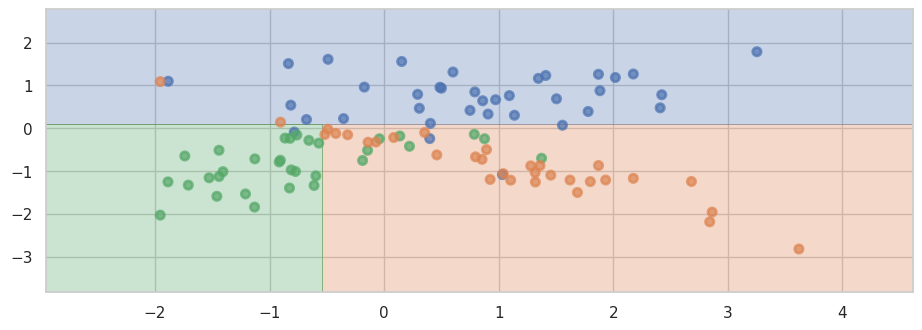

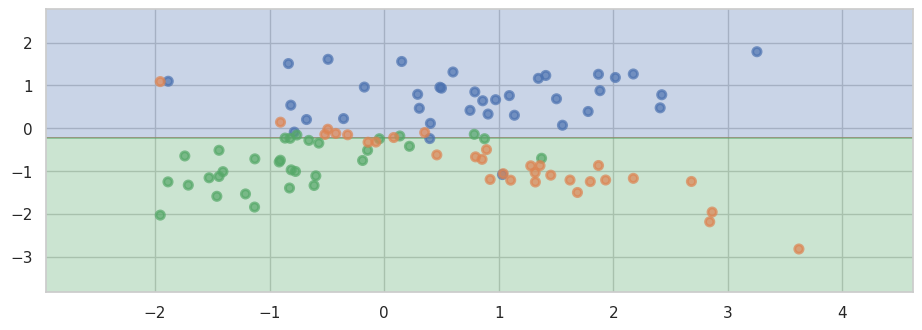

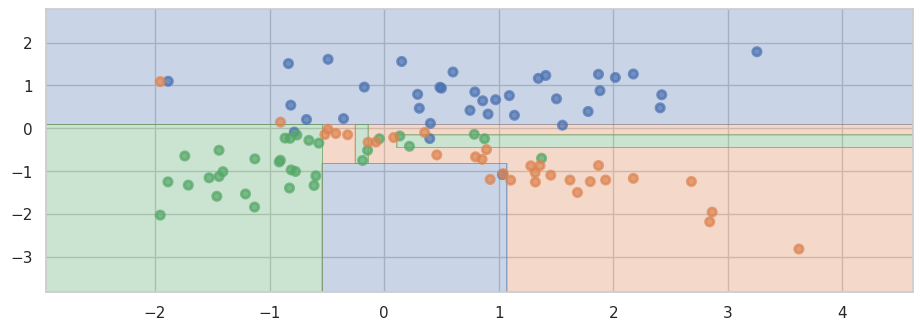

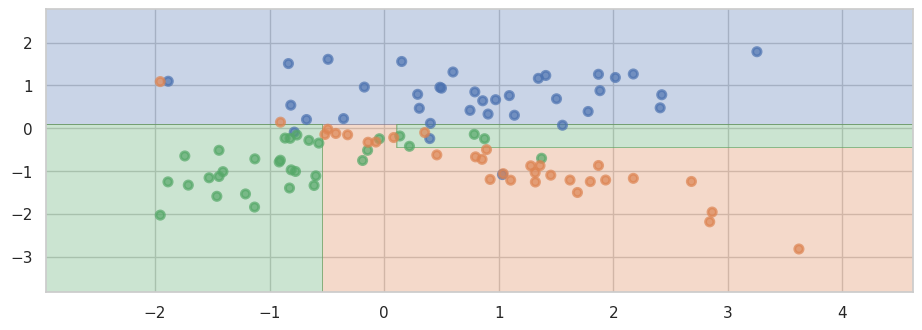

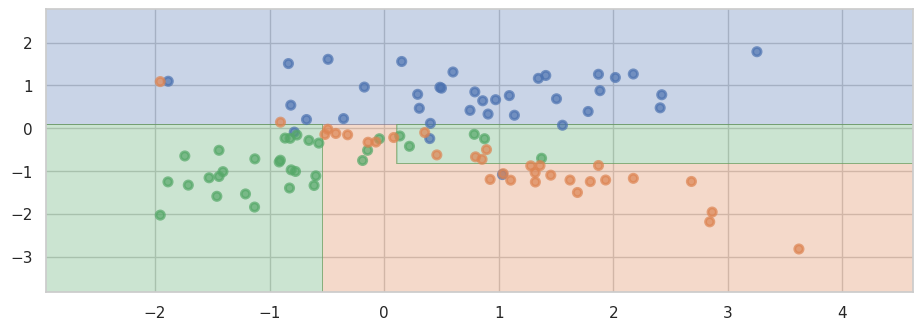

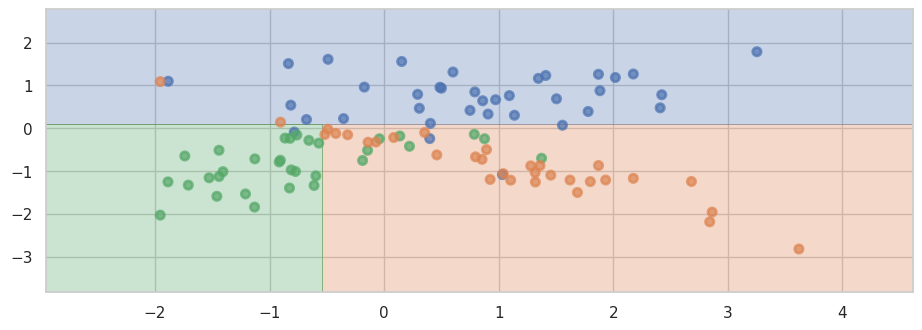

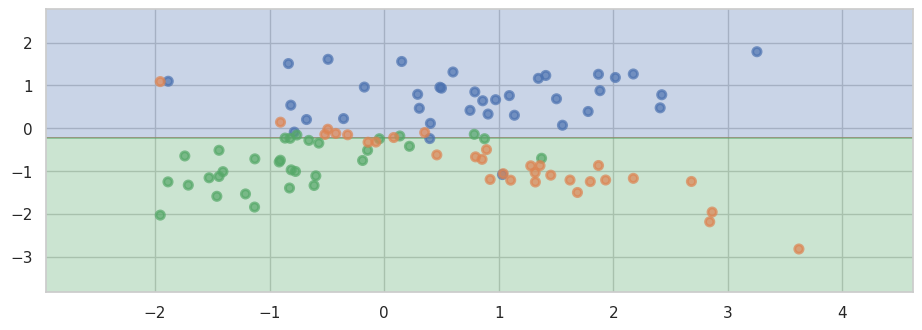

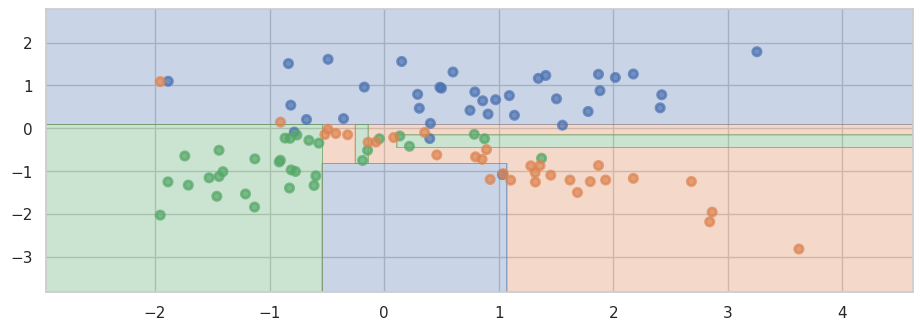

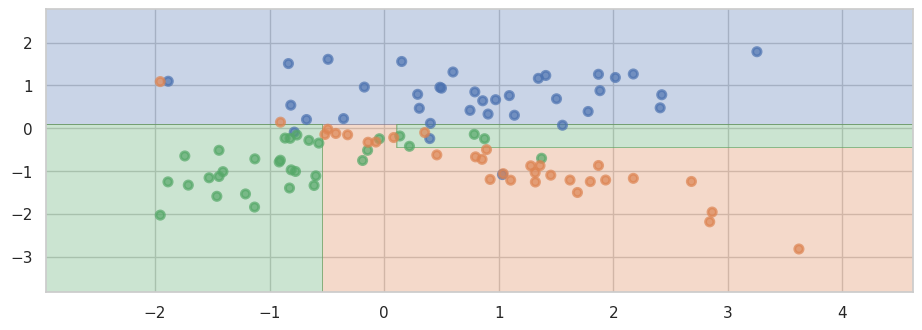

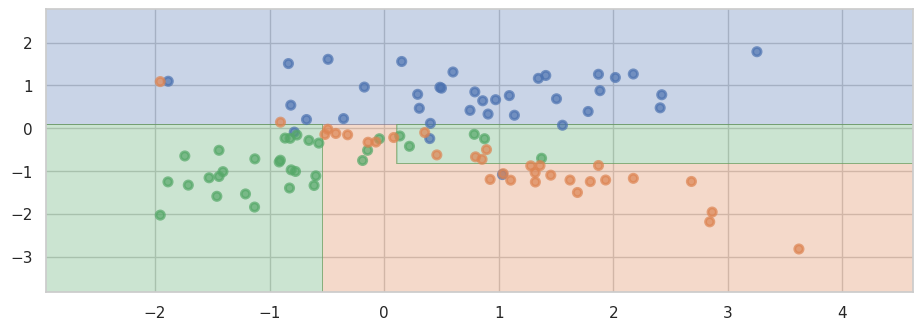

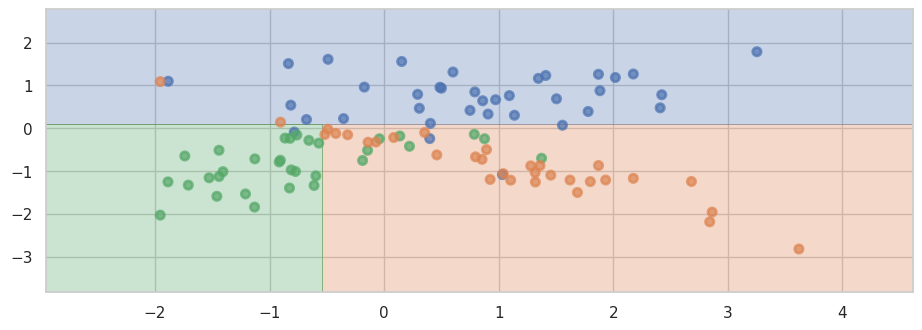

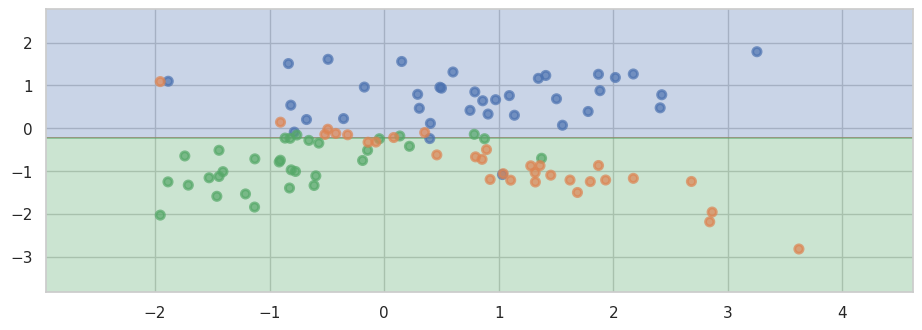

In [430]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

for param in param_grid:
    fig, ax = plt.subplots(figsize=(10, 4))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    lr  = DecisionTreeClassifier(max_depth = param['max_depth'], min_samples_leaf = param['min_samples_leaf']).fit(X_train, y_train)
    print(f"For depth {param['max_depth']} and leaves {param['min_samples_leaf']} accuracy on train is equal to {accuracy_score(y_train, lr.predict(X_train))} and on test is equal to {accuracy_score(y_test, lr.predict(X_test))}")
    plot_surface(lr, X, y)

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/102940006/

In [407]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    def get_gini(feature_vector, target_vector):
      indexes = np.argsort(feature_vector)
      feature_vector = feature_vector[indexes]
      target_vector = target_vector[indexes]
      n = np.arange(1, feature_vector.size)
      p1 = np.cumsum(target_vector)[:-1] / n
      p2 = (np.sum(target_vector) - np.cumsum(target_vector)[:-1]) / (n[::-1])
      return ((-n / len(feature_vector)) * (1 - p1 ** 2 - (1 - p1) ** 2) - (1 - (n / len(feature_vector))) * (1 - p2 ** 2 - (1 - p2) ** 2))[np.diff(feature_vector) != 0]
    feature_unique = np.unique(feature_vector)
    thresholds = (feature_unique[1:] + feature_unique[:-1]) / 2
    if len(feature_unique) <= 1:
        return None, None, None, None
    ginis = get_gini(feature_vector, target_vector)
    i = np.argmax(ginis)
    threshold_best = thresholds[i]
    gini_best = ginis[i]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): # Проверяем, равны ли все элементы в node (меняем != на ==)
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]): # Начинаем с 0, а не с 1
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) #Меняем 1 на 0
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:# Меняем 3 на 1 и добавляем юник
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": # Меняем заглавную букву на строчную
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common()[0][0]# Добавляем нули, тк иначе вернет тюпл
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node['type'] == 'terminal': # если terminal, заканчиваем
            return node['class']
        
        if self._feature_types[node['feature_split']] == 'real':
            if x[node['feature_split']] >= node['threshold']:
                return self._predict_node(x, node['right_child'])
            else:
                return self._predict_node(x, node['left_child']) 
                
        if self._feature_types[node['feature_split']] == 'categorical':
            if x[node['feature_split']] not in node['categories_split']:
                return self._predict_node(x, node['right_child'])
            else:
                return self._predict_node(x, node['left_child'])
        raise ValueError
    def get_params(self):
        return {'feature_types': self._feature_types}
        
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)
        return self

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

In [ ]:
threshold_best

3.5

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [409]:
df = pd.read_csv('/content/students.csv')

In [410]:
df.head(3)

STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0

In [412]:
thresholds_STG, ginis_STG, threshold_best_STG, gini_best_STG = find_best_split(np.array(df['STG']), np.array(df['UNS']))

In [413]:
thresholds_SCG, ginis_SCG, threshold_best_SCG, gini_best_SCG = find_best_split(np.array(df['SCG']), np.array(df['UNS']))

In [414]:
thresholds_STR, ginis_STR, threshold_best_STR, gini_best_STR = find_best_split(np.array(df['STR']), np.array(df['UNS']))

In [415]:
thresholds_LPR, ginis_LPR, threshold_best_LPR, gini_best_LPR = find_best_split(np.array(df['LPR']), np.array(df['UNS']))

In [416]:
thresholds_PEG, ginis_PEG, threshold_best_PEG, gini_best_PEG = find_best_split(np.array(df['PEG']), np.array(df['UNS']))

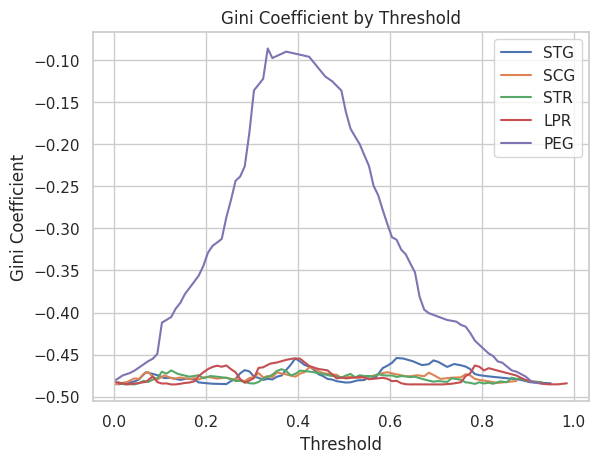

In [417]:
plt.plot(thresholds_STG, ginis_STG, label ='STG')
plt.plot(thresholds_SCG, ginis_SCG, label ='SCG')
plt.plot(thresholds_STR, ginis_STR, label ='STR')
plt.plot(thresholds_LPR, ginis_LPR, label ='LPR')
plt.plot(thresholds_PEG, ginis_PEG, label ='PEG')

plt.xlabel("Threshold")
plt.ylabel("Gini Coefficient")
plt.legend()
plt.title('Gini Coefficient by Threshold')

plt.show()

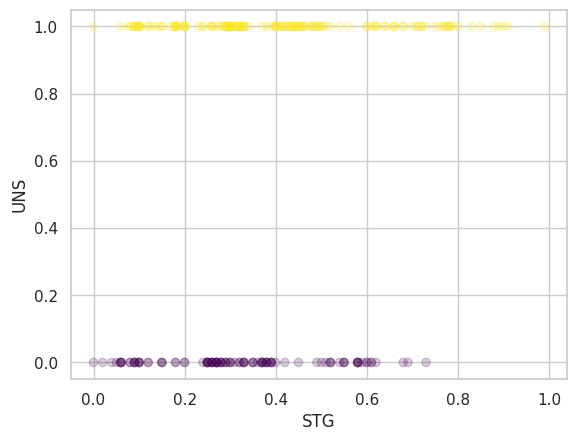

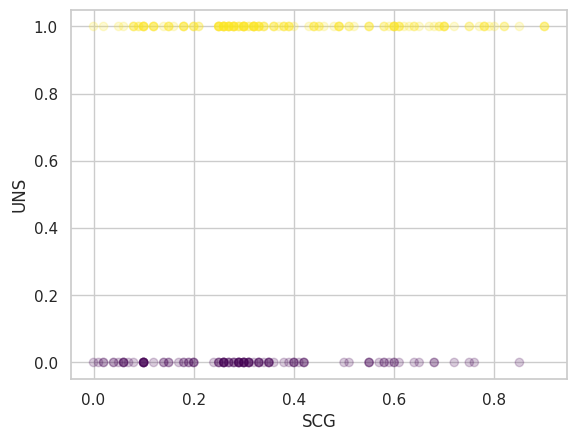

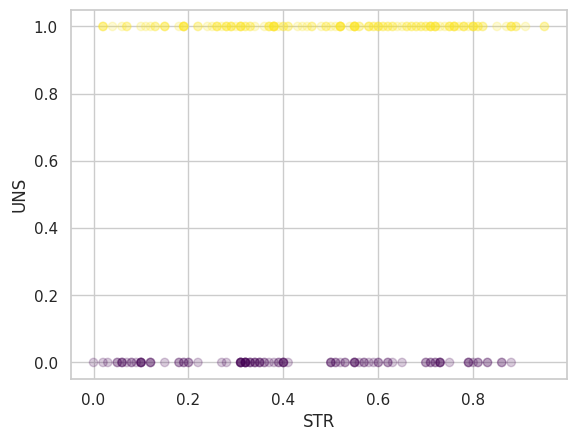

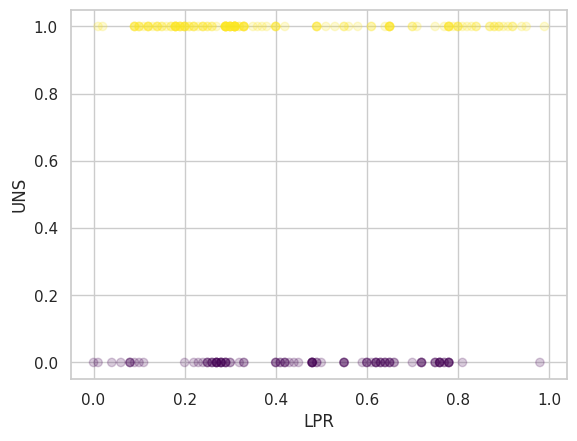

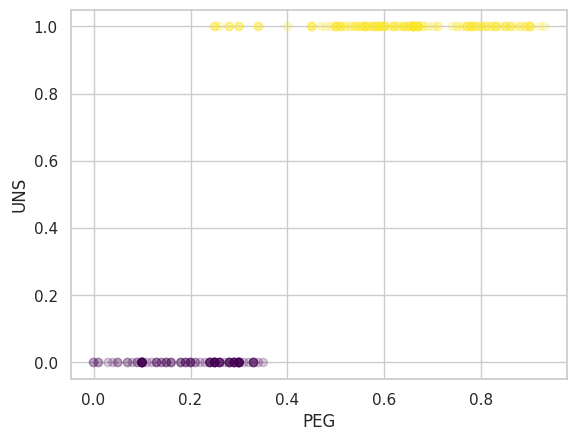

In [418]:
for feature in list(df)[:-1]:
  plt.scatter(df[feature], df['UNS'], alpha=0.2, c=df['UNS'], cmap='viridis')
  plt.xlabel(feature)
  plt.ylabel('UNS')
  plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из графика Джини, в глаза сразу бросается признак PEG. Он дает наибольшее улучшение в плане этого критерия, и выглядит как парабола с лучшим значением (вершиной) в лучшем пороге - там, где мы проведем разделяющую прямую. Если смотерть на скаттер-графики, то можно заметить, что разделяющую прямую (порог) с наименьшеф ошибкой проще всего провести именно на графике для PEG. Остальные признаки больше похожи на прямую - они коляблются возле одного значения, и ни один порог не дает значительного улучшения. Это можно увидеть и на скаттер-графиках: объекты по числовой прямой распределены практически одинаково и равномерно.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/56884/run-report/102940114/

In [ ]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    def get_gini(feature_vector, target_vector):
      indexes = np.argsort(feature_vector)
      feature_vector = feature_vector[indexes]
      target_vector = target_vector[indexes]
      n = np.arange(1, feature_vector.size)
      p1 = np.cumsum(target_vector)[:-1] / n
      p2 = (np.sum(target_vector) - np.cumsum(target_vector)[:-1]) / (n[::-1])
      return ((-n / len(feature_vector)) * (1 - p1 ** 2 - (1 - p1) ** 2) - (1 - (n / len(feature_vector))) * (1 - p2 ** 2 - (1 - p2) ** 2))[np.diff(feature_vector) != 0]
    feature_unique = np.unique(feature_vector)
    thresholds = (feature_unique[1:] + feature_unique[:-1]) / 2
    if len(feature_unique) <= 1:
        return None, None, None, None
    ginis = get_gini(feature_vector, target_vector)
    i = np.argmax(ginis)
    threshold_best = thresholds[i]
    gini_best = ginis[i]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): # Проверяем, равны ли все элементы в node (меняем != на ==)
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]): # Начинаем с 0, а не с 1
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) #Меняем 1 на 0
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:# Меняем 3 на 1 и добавляем юник
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": # Меняем заглавную букву на строчную
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common()[0][0]# Добавляем нули, тк иначе вернет тюпл
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node['type'] == 'terminal': # если terminal, заканчиваем
            return node['class']
        
        if self._feature_types[node['feature_split']] == 'real':
            if x[node['feature_split']] >= node['threshold']:
                return self._predict_node(x, node['right_child'])
            else:
                return self._predict_node(x, node['left_child']) 
                
        if self._feature_types[node['feature_split']] == 'categorical':
            if x[node['feature_split']] not in node['categories_split']:
                return self._predict_node(x, node['right_child'])
            else:
                return self._predict_node(x, node['left_child'])
        raise ValueError
    def get_params(self):
        return {'feature_types': self._feature_types}
        
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)
        return self

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [17]:
from hw5code import DecisionTree

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
from ucimlrepo import fetch_ucirepo

In [79]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None)

In [11]:
le = LabelEncoder()

In [20]:
from sklearn.model_selection import train_test_split

In [63]:
import numpy as np

In [74]:
from sklearn.metrics import accuracy_score

In [80]:
y = np.array(le.fit_transform(df[0]))
X = np.array(df.drop(columns = [0]).apply(le.fit_transform))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
tree = DecisionTree(feature_types=['categorical'] * len(X))
tree.fit(X_train, y_train)

In [86]:
y_pred = tree.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred)

1.0

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [209]:
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
tictactoe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)

In [316]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

Mushrooms

In [368]:
y1 = mushrooms[0]
X1 = mushrooms.drop(columns = [0])

In [369]:
X1 = np.array(X1.apply(le.fit_transform))
y1 = np.array(le.fit_transform(y1))

In [370]:
y2 = tictactoe.iloc[:, -1]
X2 = tictactoe.drop(columns=[tictactoe.columns[-1]])

In [371]:
y2 = np.array((y2 == 'positive').astype(int))
X2 = np.array(X2.apply(le.fit_transform))

In [372]:
y3 = cars.iloc[:, -1]
X3 = cars.drop(columns=[cars.columns[-1]])

In [373]:
y3 = np.array(y3.replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}).astype(int))
X3 = np.array(X3.apply(le.fit_transform))

In [374]:
y4 = nursery.iloc[:, -1]
X4 = nursery.drop(columns=[nursery.columns[-1]])

In [375]:
X4 = np.array(X4.apply(le.fit_transform))
y4 = np.array(y4.replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}).astype(int))

In [279]:
from sklearn.preprocessing import OneHotEncoder

In [338]:
ac_real, ac_cat, ac_real_ohe,  ac_sklearn = [], [], [], []

for X, y in zip(([X1, X2, X3, X4]), ([y1, y2, y3, y4])):
    ac_real.append(cross_val_score(DecisionTree(feature_types = ['real'] * len(X)), np.array(X), y, cv = 10, scoring = make_scorer(accuracy_score)).mean())
    ac_cat.append(cross_val_score(DecisionTree(feature_types = ['categorical'] * len(X)), np.array(X), y, cv = 10, scoring = make_scorer(accuracy_score)).mean())
    X_enc = OneHotEncoder(sparse = False).fit_transform(X)
    ac_real_ohe.append(cross_val_score(DecisionTree(feature_types=['real'] * len(X_enc)), np.array(X_enc), y, cv = 10, scoring=make_scorer(accuracy_score)).mean())
    ac_sklearn.append(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = make_scorer(accuracy_score)).mean())

res = pd.DataFrame({'df': ['mushrooms', 'tictactoe', 'cars', 'nursery'], 1: ac_real, 2: ac_cat,3: ac_real_ohe, 4: ac_sklearn})

In [337]:
res

df         1         2         3         4
0  mushrooms  0.996799  0.988180  0.994335  0.961591
1  tictactoe  0.440510  0.523647  0.524695  0.714251
2       cars  0.922341  0.922319  0.895151  0.894679
3    nursery  0.999691  0.999846  0.999537  0.999691

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

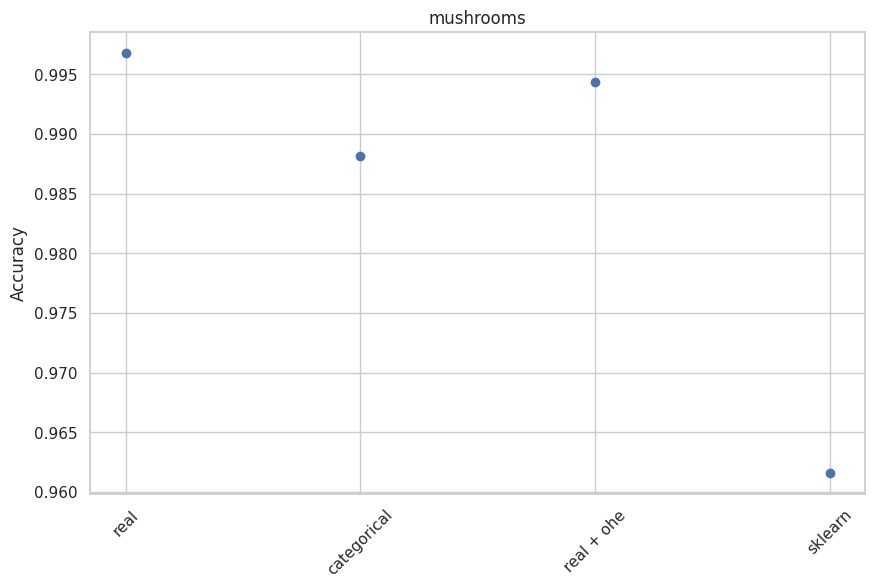

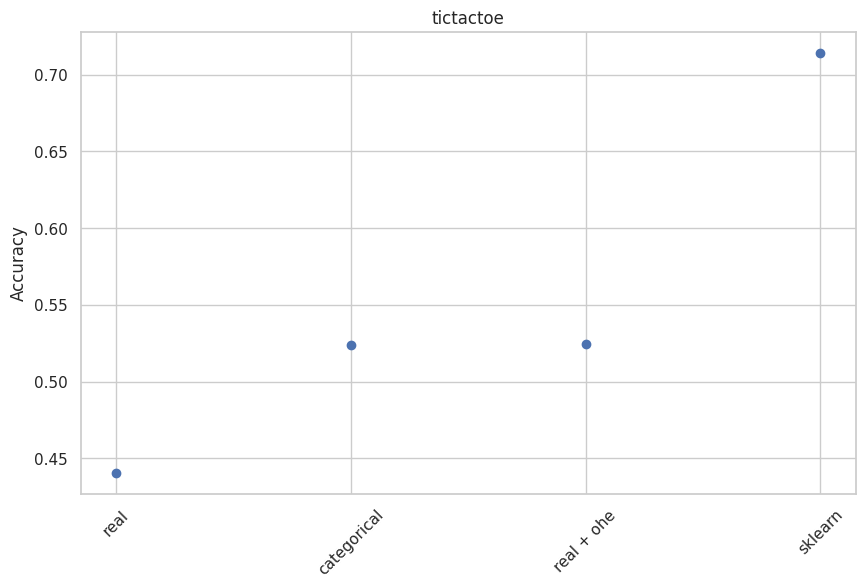

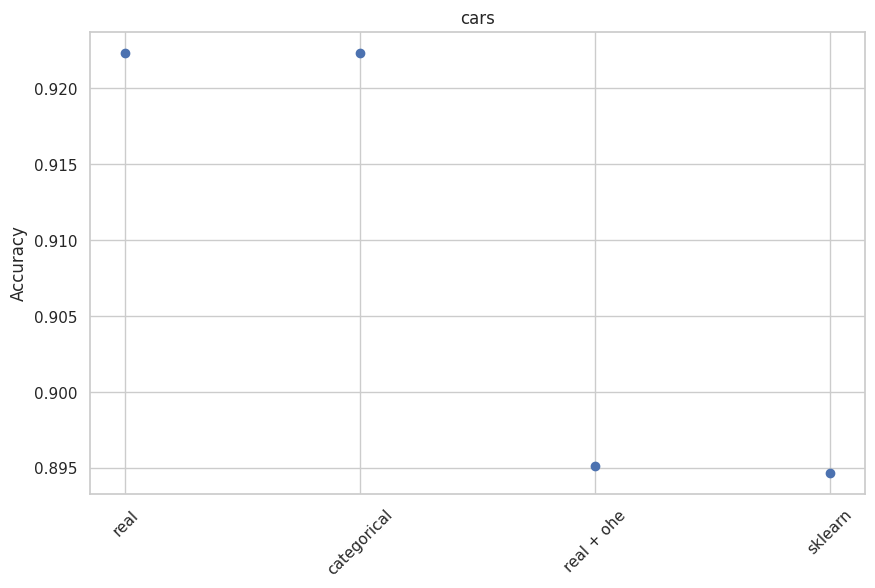

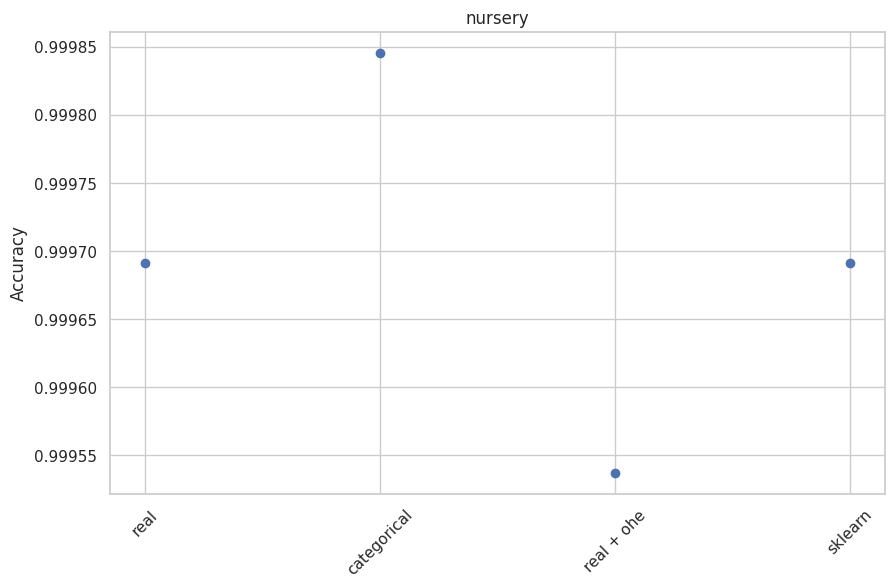

In [347]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = ['mushrooms', 'tictactoe', 'cars', 'nursery']
mets = ['real', 'categorical', 'real + ohe', 'sklearn']

for df in dfs:
    plt.figure(figsize=(10, 6))
    plt.scatter(mets, res.loc[res['df'] == df].iloc[0, 1:])
    plt.title(df)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.show()


In [360]:
y1 = mushrooms[0]
X1 = mushrooms.drop(columns = [0])

**Ответ:**
1. Mushrooms. В результате на всех датасетах получилось очень большое значение accuracy, практически равное 1. Скорее всего, это связано с тем, что для решающих деревьев на этом датасете очень легко найти признак, по которому нужно делить ( в плане, он дает наименьшую ошибку), то есть как в задании 4 мы можем довольно просто отделить одну категорию от другой. Можно сказать, что наибольший показатель при all real, а наименьший - при sklearn, но все же разница слишком незначительная, чтобы это учитывать. Здесь можно еще сказать, что в этом датасете признаки хорошо представлены в виде вещественных значений, то есть несмотря на то, что мы не рассматривали их как категориальные, качество все равно хорошее.
2. Tictactoe. Здесь получились самые плохие результаты. В случае all real accuracy хуже, чем у рандомного классификатора, при этом для sklearn результат неплохой. В этом датасете хранятся исходы игры в крестики-нолики, их очень много, и, видимо, они слабо скоррелированы с другими параметрами, и предсказывать их сложно, скорее все это похоже на рандом - в игре практически нет все время выигрышной стратегии.
3. Cars. Все методы показали хорошее качество accuracy, близкое к 1, но не такое близкое, как на следующем датасете. Здесь есть признаки, которые логически должны обосновывать таргет (таргет - класс качества, есть признаки, изменряющие цену, размер), так что логично, что дерево найдет, по каким признакам и как лучше классифицировать.
4. Nursery. На этом датасете самые высокие показатели accuracy среди всех. Это, должно быть, связано с тем, что логически корреляция признаков и таргета, действительно, очень высокая (например, если родители человека - врачи, то вероятность того, что ребенок будет врачом, довольно высокая). Еще здесь много категорий категориальных признаков, так что accuracy при их использовании как категориальных немного выше.



